In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')

In [3]:
filtered_data = data[data['CarDriver'] == 1]


In [4]:
target = filtered_data['Hsptlsns'].shift(-1)


In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge(solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)



In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

RMSE: 109.83
MAE: 6.48
R^2: 0.49


In [7]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 6.417876725442872
MAE: 4.38273846687894
R^2: 0.5430964868004735


In [8]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
Nmse_values = []
ioa_values = []
r2_values = []
aic_values=[]
bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)
# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 6.417876725442872
MAE: 4.38273846687894
R^2: 0.5430964868004735
NMSE score: 0.613127057672879
Index of Agreement: 0.83
AIC: 13679.364767276475
BIC: 13933.745102420598


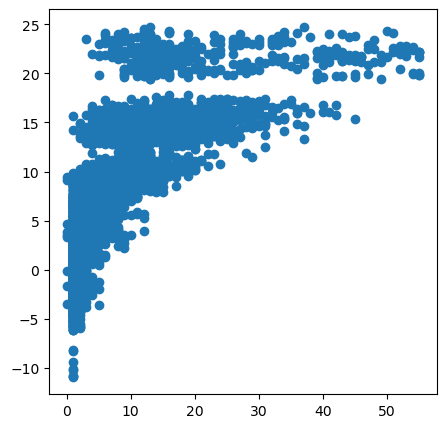

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

# CarPngr

In [9]:
filtered_data2 = data[data['CarPngr'] == 1]


In [10]:
target = filtered_data2['Hsptlsns'].shift(-1)

In [11]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)


rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

RMSE: 15.32
MAE: 2.47
R^2: 0.35


In [12]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 2.7204018361814346
MAE: 1.9336721490585291
R^2: 0.3728925713533824


In [13]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)
# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 2.7204018361814346
MAE: 1.9336721490585291
R^2: 0.3728925713533824
NMSE score: 0.561043432641224
Index of Agreement: 0.72
AIC: 6991.38238109043
BIC: 7243.397452230765


# Mtrcyclist

In [14]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
target = filtered_data3['Hsptlsns'].shift(-1)

In [15]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

## from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

RMSE: 9.01
MAE: 6.14
R^2: 0.48


In [16]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 6.212813970874136
MAE: 4.465900247908272
R^2: 0.5013448194219663


In [17]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)
# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 6.212813970874136
MAE: 4.465900247908272
R^2: 0.5013448194219663
NMSE score: 0.9289138695441167
Index of Agreement: 0.80
AIC: 11991.522815234879
BIC: 12241.19159668367


# Pedal cyclist Regrasion


In [18]:
filtered_data4 = data[data['PdlCyclist'] == 1]
target = filtered_data4['Hsptlsns'].shift(-1)

In [19]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

## from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

RMSE: 7.33
MAE: 4.68
R^2: 0.33


In [20]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 4.679496199490403
MAE: 3.241349966466633
R^2: 0.3177541964268892


In [21]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)
# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 4.679496199490403
MAE: 3.241349966466633
R^2: 0.3177541964268892
NMSE score: 0.9435283968235375
Index of Agreement: 0.67
AIC: 11230.00784297118
BIC: 11483.880536467192


# Pedestrian

In [22]:
filtered_data5 = data[data['Pedestrian'] == 1]
target = filtered_data5['Hsptlsns'].shift(-1)

In [23]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

## from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

RMSE: 4.29
MAE: 2.94
R^2: 0.38


In [24]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 3.6607398004168945
MAE: 2.593933367113898
R^2: 0.3765715223487416


In [25]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

ridge_model = Ridge(alpha=1.0, solver='lbfgs',positive=True)
ridge_model.fit(x_train, y_train)


predicted_counts = ridge_model.predict(x_test)
# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 3.6607398004168945
MAE: 2.593933367113898
R^2: 0.3765715223487416
NMSE score: 0.7847140061575355
Index of Agreement: 0.72
AIC: 4732.832285564238
BIC: 4957.966876899168


In [26]:
Nmse_values

[0.613127057672879,
 0.561043432641224,
 0.9289138695441167,
 0.9435283968235375,
 0.7847140061575355]

In [27]:
ioa_values

[0.8311050816880307,
 0.7185974146073768,
 0.7959424968916474,
 0.671515884890869,
 0.7199826361177912]

In [28]:
r2_values

[0.5430964868004735,
 0.3728925713533824,
 0.5013448194219663,
 0.3177541964268892,
 0.3765715223487416]

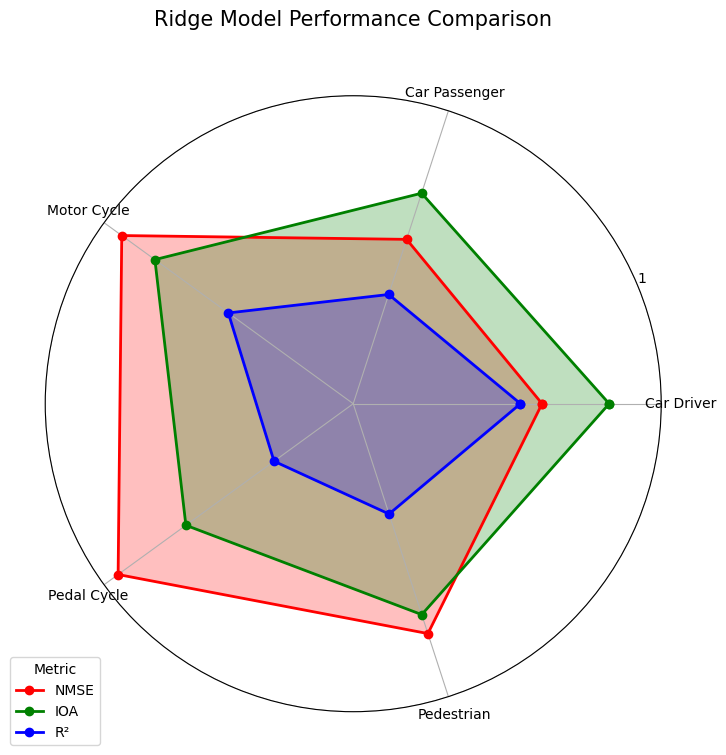

In [29]:
import matplotlib.pyplot as plt
import numpy as np

nmse_values = [0.613127057672879,
 0.561043432641224,
 0.9289138695441167,
 0.9435283968235375,
 0.7847140061575355]


ioa_values = [0.8311050816880307,
 0.7185974146073768,
 0.7959424968916474,
 0.671515884890869,
 0.7199826361177912]


r2_values =[0.5430964868004735,
 0.3728925713533824,
 0.5013448194219663,
 0.3177541964268892,
 0.3765715223487416]

labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

data = np.array([nmse_values, ioa_values, r2_values])

num_vars = data.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['red', 'green', 'blue']
labels_metric = ['NMSE', 'IOA', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  
    else:
        alpha_value = 0.25 
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('Ridge Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_ylim(0, 1)

plt.show()


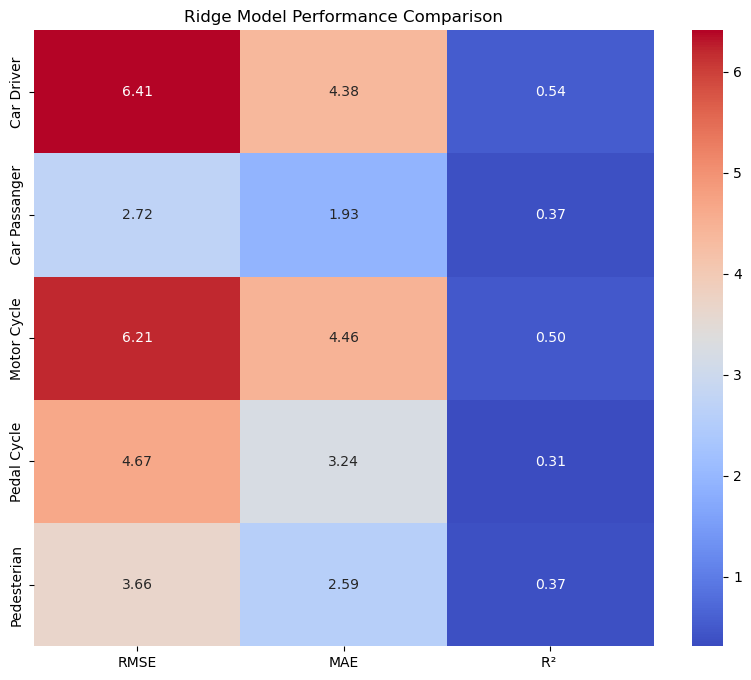

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
mse_values = [6.41, 2.72 , 6.21 , 4.67, 3.66]
mae_values = [4.38, 1.93 ,4.46 ,3.24,  2.59]
r2_values = [0.54, 0.37 ,0.50 , 0.31 ,  0.37]

# ایجاد داده‌ها برای هیت مپ
metrics = ['Car Driver', ' Car Passanger ', 'Motor Cycle', 'Pedal Cycle', 'Pedesterian']
models = ['RMSE', 'MAE', 'R² ']
data = np.array([mse_values, mae_values, r2_values]).T
#metrics
# ایجاد هیت مپ
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data, annot=True, fmt='.2f', xticklabels=models, yticklabels=metrics, cmap='coolwarm')
heatmap.set_title('Ridge Model Performance Comparison')

plt.show()

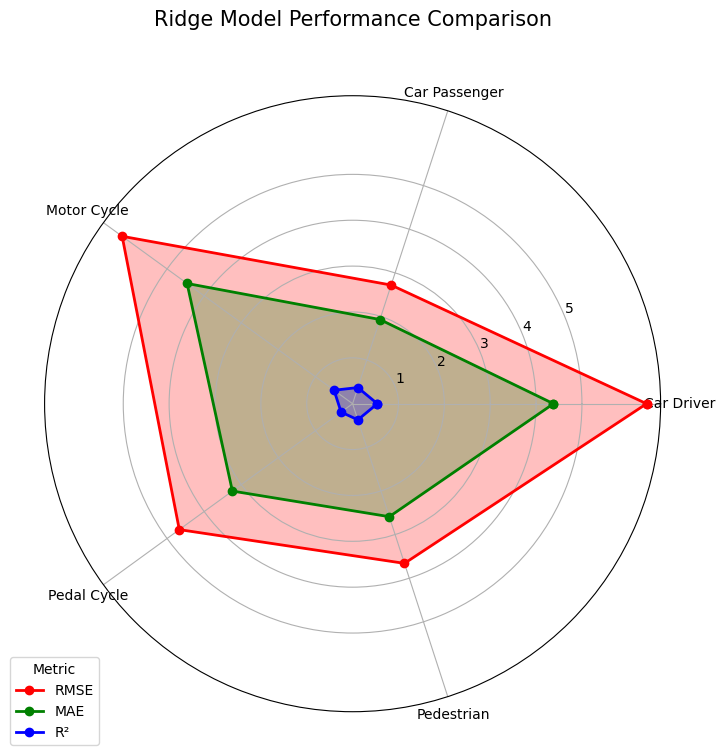

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [6.41, 2.72 , 6.21 , 4.67, 3.66]
mae_values = [4.38, 1.93 ,4.46 ,3.24,  2.59]
r2_values = [0.54, 0.37 ,0.50 , 0.31 ,  0.37]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=0.25, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('Ridge Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

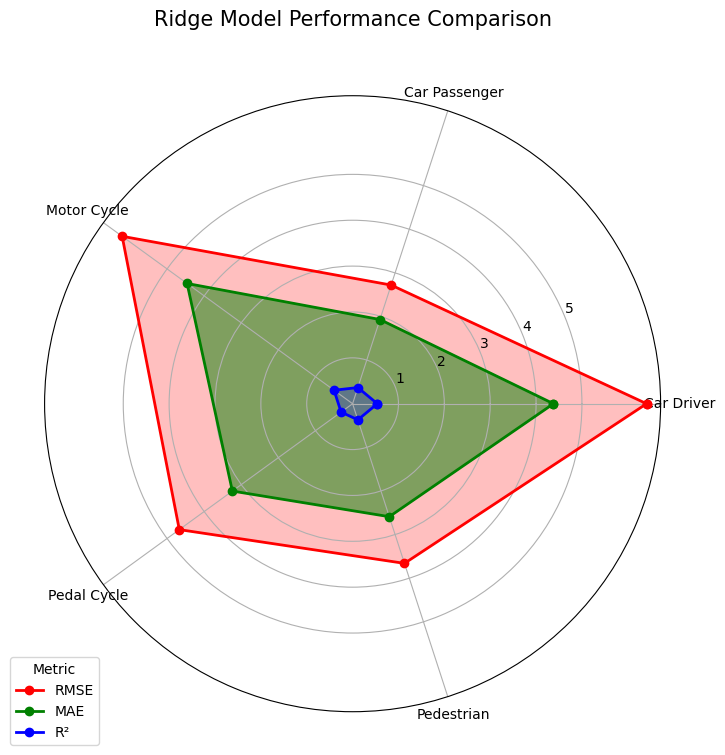

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [6.41, 2.72 , 6.21 , 4.67, 3.66]
mae_values = [4.38, 1.93 ,4.46 ,3.24,  2.59]
r2_values = [0.54, 0.37 ,0.50 , 0.31 ,  0.37]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  # تنظیم شفافیت برای MAE
    else:
        alpha_value = 0.25  # تنظیم شفافیت برای سایر معیارها
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('Ridge Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
